a) Suppose we wish to fit a linear model H(x) = w0 + w1x to this data, and it is known that w0 = 2.
Write a function, mse(w_1), that takes in a possible value of w1 and returns the mean squared error
of the linear model H(x) = 2 + w1x with respect to the data set. You may use numpy. This problem
is not autograded, but turn in your code (either copy/pasting or as a screenshot).
Hint: The MSE at w1 = 1 should be approximately 139.6

In [21]:
import numpy as np

data_np = np.loadtxt('data.csv', delimiter=',')

x_np = data_np[:, 0]
y_np = data_np[:, 1]

def mse(w1, x, y):
    y_pred = 2 + w1*x
    return np.mean((y - y_pred)**2)

print(mse(1, x_np, y_np))



139.60271462


b) Suppose we are now thinking probabilistically, and we believe that the data has been generated by
the model Y = w0 + w1X + , where  ∼ N (0, σ2
). Suppose it is known that σ = 4 and that w0 = 2.
Write a function, log_likelihood(w_1), that takes in a possible value of w1 and returns the log
likelihood of the linear model Y = 2 + w1X +  with respect to the data set. You may use numpy.
Show your code.
Hint: The log likelihood at w1 = 1 should be approximately -333.39

In [ ]:
import numpy as np

def log_likelihood(w_1, x_data, y_data):
    w_0 = 2
    sigma = 4
    n = len(x_data)
    predictions = w_0 + w_1 * x_data
    residuals = y_data - predictions
    rss = np.sum(residuals**2)
    part1 = -0.5 * n * np.log(2 * np.pi * sigma**2)
    part2 = -rss / (2 * sigma**2)
    log_like = part1 + part2
    return log_like
test_w1 = 1
log_like_value = log_likelihood(test_w1, x_np, y_np)
print(f"Log-likelihood at w1 = {test_w1}: {log_like_value}")

Log-likelihood at w1 = 1: -333.3908863099782


c) Using scipy.optimize.fmin, find the value of w1 that minimizes the mean squared error.
Note: doing this numerically is overkill: we have a closed-form solution for the value of w1 that
minimizes the mean squared error.

In [ ]:
from scipy.optimize import fmin

# For part 1c - find w1 that minimizes the MSE
def mse(w_1):
    w_0 = 2  # Fixed as given in the problem
    predictions = w_0 + w_1 * x_np
    squared_errors = (y_np - predictions)**2
    return np.mean(squared_errors)

# Find optimal w1 using fmin with initial guess of 1
optimal_w1_mse = fmin(mse, 1, disp=False)[0]
optimal_w1_mse

np.float64(3.007226562500004)

d) Again using scipy.optimize.fmin, find the value of w1 that maximizes the log likelihood.

In [26]:
from scipy.optimize import fmin

def log_likelihood(w_1):
    w_0 = 2
    sigma = 4
    n = len(x_np)  
    predictions = w_0 + w_1 * x_np  
    errors = y_np - predictions  
    return -n/2 * np.log(2 * np.pi * sigma**2) - np.sum(errors**2) / (2 * sigma**2)

optimal_w1_log = fmin(log_likelihood, 1, disp=False)[0]
optimal_w1_log

np.float64(-6.338253001141156e+28)

e) 
 Plot the MSE for all values of w1 between 0 and 5. On the same graph, plot the log likelihood for all
of the same values. Plot a vertical line at the value of w1 that minimizes the mean squared error (and
maximize the log likelihood). Include a legend in your plot that tells which line is which.
Note: you may use matplotlib to make your plot. You might want to use plt.axvline to plot the
vertical line and plt.legend to include a legend.

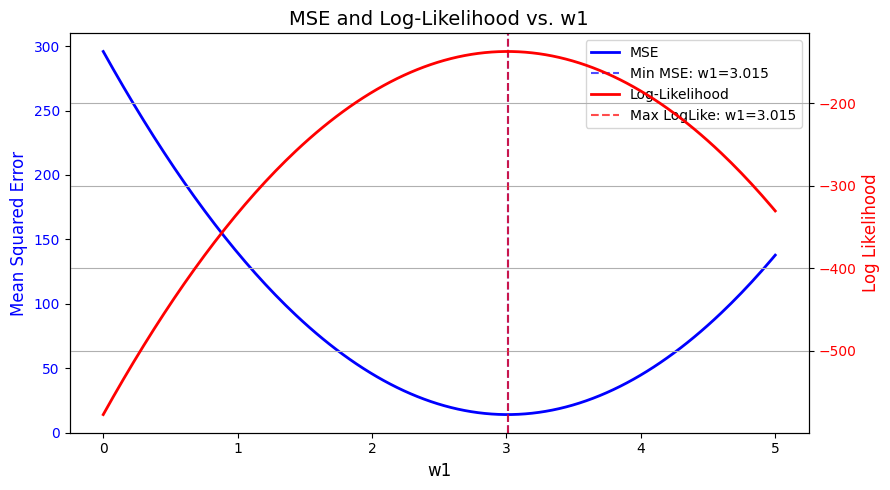

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1) Load data and define MSE and log-likelihood functions
# ------------------------------------------------------------------
data = np.loadtxt('data.csv', delimiter=',')
x = data[:, 0]
y = data[:, 1]

def mse_function(w1, x, y):
    """Mean Squared Error for model y_pred = 2 + w1*x."""
    y_pred = 2 + w1*x
    return np.mean((y - y_pred)**2)

def loglike_function(w1, x, y, sigma=4.0):
    """Log-likelihood assuming normal errors with variance sigma^2."""
    intercept = 2.0
    n = len(x)
    residuals = y - (intercept + w1*x)
    rss = np.sum(residuals**2)

    part1 = -0.5 * n * np.log(2 * np.pi * sigma**2)
    part2 = -rss / (2 * sigma**2)
    return part1 + part2

# ------------------------------------------------------------------
# 2) Generate a range of w1 values and compute both curves
# ------------------------------------------------------------------
w1_values = np.linspace(0, 5, 200)
mse_values = [mse_function(w, x, y) for w in w1_values]
ll_values  = [loglike_function(w, x, y, sigma=4.0) for w in w1_values]

# Find the w1 that *minimizes* MSE and *maximizes* log-likelihood
best_w1_mse = w1_values[np.argmin(mse_values)]
best_w1_ll  = w1_values[np.argmax(ll_values)]

# ------------------------------------------------------------------
# 3) Plot using two vertical axes (MSE on left, Log-Like on right)
# ------------------------------------------------------------------
fig, ax1 = plt.subplots(figsize=(9,5))

# Plot the MSE on the left axis
mse_line = ax1.plot(w1_values, mse_values, color='blue', linewidth=2,
                    label='MSE')
ax1.set_xlabel('w1', fontsize=12)
ax1.set_ylabel('Mean Squared Error', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a twin axis for Log-Likelihood on the right
ax2 = ax1.twinx()
ll_line = ax2.plot(w1_values, ll_values, color='red', linewidth=2,
                   label='Log-Likelihood')
ax2.set_ylabel('Log Likelihood', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# ------------------------------------------------------------------
# 4) Add vertical lines at optimal w1 values
# ------------------------------------------------------------------
ax1.axvline(best_w1_mse, color='blue', linestyle='--', alpha=0.7,
            label=f'Min MSE: w1={best_w1_mse:.3f}')
ax2.axvline(best_w1_ll, color='red', linestyle='--', alpha=0.7,
            label=f'Max LogLike: w1={best_w1_ll:.3f}')

# ------------------------------------------------------------------
# 5) Combine legends from both axes
# ------------------------------------------------------------------
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best')

# Finishing touches
plt.title("MSE and Log-Likelihood vs. w1", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()
